### Isochores



In [1]:
%config InlineBackend.close_figures=False
%matplotlib inline
from matplotlib import interactive
interactive(False)

In [2]:
from sur import *
setup_database()

In [3]:
m = Mixture()
m.add_many('methane propane n-pentane n-decane n-hexadecane', 
           '0.822  0.088  0.050  0.020  0.020')

s = EosSetup.objects.create(eos='RKPR', kij_mode=EosSetup.T_DEP, lij_mode='constants')


env = m.get_envelope(setup=s)

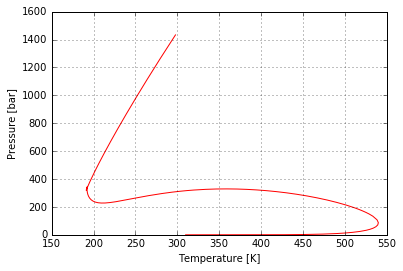

In [4]:
fig = env.plot()
fig

In [15]:
help(m.get_isochore)

Help on method get_isochore in module sur.models:

get_isochore(self, setup, v, ts, ps, t_sup, t_step=5.0, t_inf=270.0) method of sur.models.Mixture instance
    Get the isochore (isoV) for this mixture, calculated using
    the setup EOS with its selected interaction parameters
    mode.



In [5]:
isochore = m.get_isochore(setup=s, v=10., ts=467.01, ps=3.86, t_sup=465.0, t_step=5.0, t_inf=270.0)

You can get the raw input and output

In [6]:
print(isochore.input_txt)

5		NC
5       nplus
isoV            Spec    v(k), ts and ps 
0.822  0.088  0.05  0.02  0.02  		z1,z2...zNC
10.0   467.01    3.86         v(L/mol)+Ts+Ps
465.0  5.0  270.0         T(K)+dT+Tinf
3				NMODEL (1:SRK / 2:PR / 3:RKPR)
0  1			ncomb, nTdep
METHANE(1)
190.564  45.99 0.0115478  0.116530154855 1.16          tc, pc, ohm, vc, zrat
2.30376807604   0.0304337956072   0.5   1.54083758839		ac, b, delta1, k
PROPANE(2)
369.83  42.48 0.152291  0.233012170918 1.16          tc, pc, ohm, vc, zrat
9.80216972295   0.0598748909487   1.663687   1.9574557212		ac, b, delta1, k
0.013831          k0
190.564       tstar
-0.047134 		lij
n-PENTANE(3)
469.7  33.7 0.251506  0.366506659349 1.16          tc, pc, ohm, vc, zrat
20.2236971345   0.0936309815449   1.957315   2.28798764446		ac, b, delta1, k
0.030221   0.0          k0
190.564   369.83       tstar
-0.084739   -0.010835 		lij
n-DECANE(4)
617.7  21.1 0.492328  0.756468369911 1.16          tc, pc, ohm, vc, zrat
56.6610724692   0.192140038284   2.239538 

In [7]:
print(isochore.output_txt)

  The plus fraction from component            5  is   2.000000000000000E-002
    T(K)   rho(mol/L)   P(bar)    v(L/mol)     beta       betav    xplus   yplus
    iter
  467.01  0.1000E+00  0.3860E+01  0.1000E+02  0.1000E+01  0.1000E+01
  465.00  0.1000E+00  0.3845E+01  0.1000E+02  0.9984E+00  0.9999E+00  0.898332  0.018611   6
  460.00  0.1000E+00  0.3792E+01  0.1000E+02  0.9950E+00  0.9998E+00  0.890882  0.015582   7
  455.00  0.1000E+00  0.3740E+01  0.1000E+02  0.9919E+00  0.9997E+00  0.882580  0.012958   7
  450.00  0.1000E+00  0.3689E+01  0.1000E+02  0.9892E+00  0.9996E+00  0.873347  0.010699   7
  445.00  0.1000E+00  0.3640E+01  0.1000E+02  0.9869E+00  0.9995E+00  0.863099  0.008769   7
  440.00  0.1000E+00  0.3591E+01  0.1000E+02  0.9848E+00  0.9994E+00  0.851757  0.007130   7
  435.00  0.1000E+00  0.3544E+01  0.1000E+02  0.9829E+00  0.9994E+00  0.839247  0.005750   8
  430.00  0.1000E+00  0.3498E+01  0.1000E+02  0.9812E+00  0.9993E+00  0.825509  0.004596   8
  425.00  0.1000E+00

los vectores t y p son recortados en dos partes, como se generan

In [8]:
isochore.t

array([ 467.01,  465.  ,  460.  ,  455.  ,  450.  ,  445.  ,  440.  ,
        435.  ,  430.  ,  425.  ,  420.  ,  415.  ,  410.  ,  405.  ,
        400.  ,  395.  ,  390.  ,  385.  ,  380.  ,  375.  ,  370.  ,
        365.  ,  360.  ,  355.  ,  350.  ,  345.  ,  340.  ,  335.  ,
        330.  ,  325.  ,  320.  ,  315.  ,  310.  ,  305.  ,  300.  ,
        295.  ,  290.  ,  285.  ,  280.  ,  275.  ,  270.  ])

In [9]:
isochore.p

array([ 3.86 ,  3.845,  3.792,  3.74 ,  3.689,  3.64 ,  3.591,  3.544,
        3.498,  3.451,  3.406,  3.361,  3.316,  3.271,  3.227,  3.182,
        3.138,  3.094,  3.05 ,  3.006,  2.962,  2.918,  2.874,  2.831,
        2.788,  2.745,  2.703,  2.66 ,  2.618,  2.576,  2.534,  2.493,
        2.451,  2.409,  2.366,  2.324,  2.281,  2.237,  2.193,  2.147,  2.1  ])

In [10]:
isochore.t_monophasic

array([  467.01,   472.01,   477.01,   482.01,   487.01,   492.01,
         497.01,   502.01,   507.01,   512.01,   517.01,   522.01,
         527.01,   532.01,   537.01,   542.01,   547.01,   552.01,
         557.01,   562.01,   567.01,   572.01,   577.01,   582.01,
         587.01,   592.01,   597.01,   602.01,   607.01,   612.01,
         617.01,   622.01,   627.01,   632.01,   637.01,   642.01,
         647.01,   652.01,   657.01,   662.01,   667.01,   672.01,
         677.01,   682.01,   687.01,   692.01,   697.01,   702.01,
         707.01,   712.01,   717.01,   722.01,   727.01,   732.01,
         737.01,   742.01,   747.01,   752.01,   757.01,   762.01,
         767.01,   772.01,   777.01,   782.01,   787.01,   792.01,
         797.01,   802.01,   807.01,   812.01,   817.01,   822.01,
         827.01,   832.01,   837.01,   842.01,   847.01,   852.01,
         857.01,   862.01,   867.01,   872.01,   877.01,   882.01,
         887.01,   892.01,   897.01,   902.01,   907.01,   912

In [11]:
isochore.p_monophasic

array([ 3.86 ,  3.91 ,  3.952,  3.994,  4.036,  4.078,  4.12 ,  4.162,
        4.204,  4.246,  4.288,  4.33 ,  4.372,  4.414,  4.456,  4.498,
        4.54 ,  4.582,  4.624,  4.666,  4.708,  4.75 ,  4.792,  4.834,
        4.876,  4.918,  4.96 ,  5.002,  5.044,  5.086,  5.128,  5.17 ,
        5.212,  5.254,  5.296,  5.338,  5.38 ,  5.422,  5.464,  5.506,
        5.548,  5.59 ,  5.632,  5.674,  5.716,  5.758,  5.8  ,  5.842,
        5.884,  5.926,  5.967,  6.009,  6.051,  6.093,  6.135,  6.177,
        6.219,  6.261,  6.303,  6.345,  6.387,  6.429,  6.471,  6.513,
        6.554,  6.596,  6.638,  6.68 ,  6.722,  6.764,  6.806,  6.848,
        6.89 ,  6.932,  6.974,  7.015,  7.057,  7.099,  7.141,  7.183,
        7.225,  7.267,  7.309,  7.351,  7.392,  7.434,  7.476,  7.518,
        7.56 ,  7.602,  7.644,  7.686,  7.728,  7.769,  7.811,  7.853,
        7.895,  7.937,  7.979,  8.021,  8.063,  8.104,  8.146,  8.188,
        8.23 ,  8.272,  8.314,  8.356])

In [12]:
isochore.rho, isochore.rho_monophasic, 

(array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1]),
 array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
         0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1

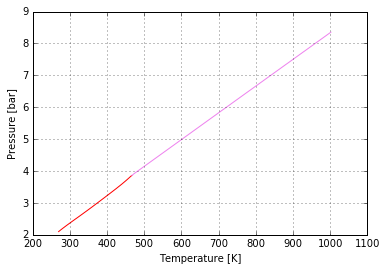

In [13]:
isochore.plot()

También se le puede pasar una figura ya generada, para que superponga el nuevo plot

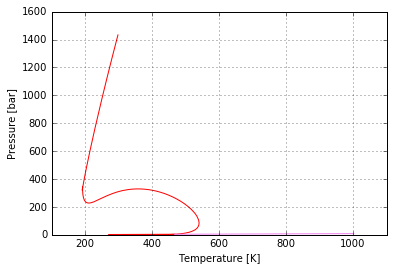

In [14]:
isochore.plot(fig)